<a href="https://colab.research.google.com/github/saadkiet/Transfer-Learning-Using-VGG-on-Cats-vs-Dogs-Image-Dataset-Project-/blob/master/Transfer_Learning_Using_VGG_on_Cats_vs_Dogs_Image_Dataset(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Set up and install

In [0]:
pip install tensorflow

In [0]:
import tensorflow as tf

In [0]:
# More imports
from tensorflow.keras.layers import Input, Dense, Flatten,Dropout
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

# Step 2 : Importing Dataset from Kaggle

In [0]:
# install Kaggle API
! pip install -q kaggle

In [0]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [0]:
# importing kaggle API key to Google Colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle

In [0]:
# disable the API key
! chmod 600 /root/.kaggle/kaggle.json

In [0]:
# import the dataset
! kaggle datasets download -d tongpython/cat-and-dog

 95% 207M/218M [00:03<00:00, 78.0MB/s]
100% 218M/218M [00:03<00:00, 67.8MB/s]


In [0]:
#Unzipping the dataset
!unzip /content/cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

In [0]:
train_path='/content/training_set/training_set'
test_path='/content/test_set/test_set'

In [0]:
# useful for getting number of files
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(test_path + '/*/*.jpg')

In [0]:
print(valid_image_files )

['/content/test_set/test_set/dogs/dog.4501.jpg', '/content/test_set/test_set/dogs/dog.4710.jpg', '/content/test_set/test_set/dogs/dog.4006.jpg', '/content/test_set/test_set/dogs/dog.4391.jpg', '/content/test_set/test_set/dogs/dog.4252.jpg', '/content/test_set/test_set/dogs/dog.4308.jpg', '/content/test_set/test_set/dogs/dog.4241.jpg', '/content/test_set/test_set/dogs/dog.4803.jpg', '/content/test_set/test_set/dogs/dog.4852.jpg', '/content/test_set/test_set/dogs/dog.4172.jpg', '/content/test_set/test_set/dogs/dog.4173.jpg', '/content/test_set/test_set/dogs/dog.4651.jpg', '/content/test_set/test_set/dogs/dog.4064.jpg', '/content/test_set/test_set/dogs/dog.4893.jpg', '/content/test_set/test_set/dogs/dog.4230.jpg', '/content/test_set/test_set/dogs/dog.4121.jpg', '/content/test_set/test_set/dogs/dog.4640.jpg', '/content/test_set/test_set/dogs/dog.4828.jpg', '/content/test_set/test_set/dogs/dog.4363.jpg', '/content/test_set/test_set/dogs/dog.4555.jpg', '/content/test_set/test_set/dogs/dog.40

In [0]:
# useful for getting number of classes
folders = glob(train_path + '/*')
folders

['/content/training_set/training_set/dogs',
 '/content/training_set/training_set/cats']

In [0]:
IMAGE_SIZE=[128,128]

# Step 3 : Loading VGG Model (BODY)

In [0]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet', 
    include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
ptm.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [0]:
ptm.trainable=False

# Step 4 : Building ANN (HEAD)

In [0]:
x=Flatten()(ptm.output)
#x=Dense(128,activation='relu)(x)
x=Dropout(0.2)(x)
x=Dense(2,activation='softmax')(x)

model=Model(inputs=ptm.input,outputs=x)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

# Step 5 : Compiling Model

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Step 6 : Setting Image Data Generator

In [0]:
# create an instance of ImageDataGenerator
gen_train = ImageDataGenerator(
  #rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  #shear_range=0.1,
  #zoom_range=0.2,
  horizontal_flip=True,
  preprocessing_function=preprocess_input
)

gen_test = ImageDataGenerator(
  preprocessing_function=preprocess_input
)

In [0]:
batch_size=128
train_gen=gen_train.flow_from_directory(directory=train_path,target_size=IMAGE_SIZE,batch_size=batch_size,shuffle=True)

test_gen= gen_test.flow_from_directory(directory=test_path,target_size=IMAGE_SIZE,batch_size=batch_size)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# step 7 : Model Training

In [0]:
r=model.fit_generator(train_gen,
                      epochs=20,
                      validation_data=test_gen,
                      steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
                      validation_steps=int(np.ceil(len(valid_image_files) / batch_size)))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
63/63 [==============================] - 72s 1s/step - loss: 2.1949 - accuracy: 0.9064 - val_loss: 1.4600 - val_accuracy: 0.9456
Epoch 2/20
63/63 [==============================] - 67s 1s/step - loss: 1.1790 - accuracy: 0.9422 - val_loss: 1.2201 - val_accuracy: 0.9550
Epoch 3/20
63/63 [==============================] - 67s 1s/step - loss: 1.0935 - accuracy: 0.9487 - val_loss: 1.5741 - val_accuracy: 0.9476
Epoch 4/20
63/63 [==============================] - 67s 1s/step - loss: 0.9484 - accuracy: 0.9523 - val_loss: 1.4454 - val_accuracy: 0.9570
Epoch 5/20
63/63 [==============================] - 67s 1s/step - loss: 0.8755 - accuracy: 0.9587 - val_loss: 1.1071 - val_accuracy: 0.9575
Epoch 6/20
63/63 [==============================] - 67s 1s/step - loss: 0.9575 - accuracy: 0.9563 - val_loss: 1.2924 - val_accuracy: 0.9570
Epoch 7/20
63/63 [==============================] - 67s 1s/step - loss: 0.7523 - acc

# Step 8 : Model Evaluation

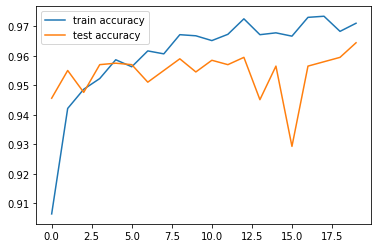

In [0]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='test accuracy')
plt.legend()

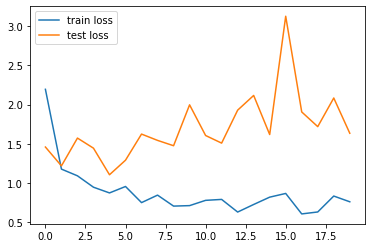

In [0]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend()

# Changing Model a bit

In [0]:
x1=Flatten()(ptm.output)
x1=Dense(128,activation='relu')(x1)
x1=Dropout(0.2)(x1)
x1=Dense(2,activation='softmax')(x1)

model1=Model(inputs=ptm.input,outputs=x1)

In [0]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [0]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
r1=model1.fit_generator(train_gen,
                      epochs=12,
                      validation_data=test_gen,
                      steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
                      validation_steps=int(np.ceil(len(valid_image_files) / batch_size)))

Epoch 1/12
63/63 [==============================] - 67s 1s/step - loss: 2.4573 - accuracy: 0.8871 - val_loss: 0.1316 - val_accuracy: 0.9560
Epoch 2/12
63/63 [==============================] - 67s 1s/step - loss: 0.1389 - accuracy: 0.9423 - val_loss: 0.1382 - val_accuracy: 0.9511
Epoch 3/12
63/63 [==============================] - 67s 1s/step - loss: 0.1142 - accuracy: 0.9559 - val_loss: 0.1039 - val_accuracy: 0.9605
Epoch 4/12
63/63 [==============================] - 67s 1s/step - loss: 0.1039 - accuracy: 0.9583 - val_loss: 0.1124 - val_accuracy: 0.9649
Epoch 5/12
63/63 [==============================] - 66s 1s/step - loss: 0.0859 - accuracy: 0.9659 - val_loss: 0.1190 - val_accuracy: 0.9624
Epoch 6/12
63/63 [==============================] - 67s 1s/step - loss: 0.0834 - accuracy: 0.9674 - val_loss: 0.1372 - val_accuracy: 0.9609
Epoch 7/12
63/63 [==============================] - 67s 1s/step - loss: 0.0792 - accuracy: 0.9674 - val_loss: 0.1317 - val_accuracy: 0.9585
Epoch 8/12
63/63 [==

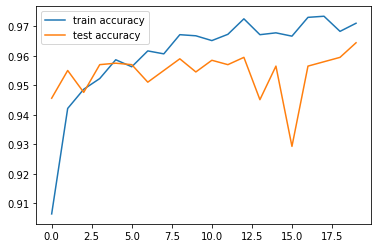

In [0]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='test accuracy')
plt.legend()

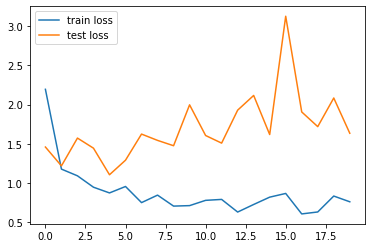

In [0]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend()